<a href="https://colab.research.google.com/github/mariaaliceas/stock-price/blob/main/finalStockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STEP INICIAL --> IMPORTACAO DE DADOS

import pandas as pd
import yfinance as yfin
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date, timedelta
import numpy as np

df = pd.DataFrame()

start_date = '2019-01-01'
end_date = '2023-12-31'

acao = ['VALE3.SA']
acao_vale = yfin.Ticker("VALE3.SA")
df = yfin.download(acao, start=start_date, end=end_date)

# df = yfin.Ticker(acao).history(period='1y')

df.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA
Date,,,,,
2019-01-02,31.897554,32.072369,31.085912,31.223266,17319600
2019-01-03,30.592682,31.803901,30.218079,31.716494,30120000
2019-01-04,32.584328,32.746658,31.104641,31.104641,43360100
2019-01-07,32.409504,33.495857,32.290880,33.008870,20998900
2019-01-08,32.721680,32.965172,32.228450,32.590569,19925600


In [ ]:
#calcula o valor do RSI

def calculate_rsi(data, window):

    delta = data['Close'].diff(1)

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()


    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))

    return rsi


df['RSI'] = calculate_rsi(df, 14)
df[['Close', 'RSI']].head(30)

Price,Close,RSI
Ticker,VALE3.SA,
Date,,
2019-01-02 00:00:00+00:00,51.090000,NaN
2019-01-03 00:00:00+00:00,49.000000,0.000000
2019-01-04 00:00:00+00:00,52.189999,60.416655
2019-01-07 00:00:00+00:00,51.910000,57.374101
2019-01-08 00:00:00+00:00,52.410000,60.891091
2019-01-09 00:00:00+00:00,53.689999,67.711170
2019-01-10 00:00:00+00:00,53.099998,62.673387
2019-01-11 00:00:00+00:00,52.380001,57.456658


In [ ]:
#CALCULO DO RSI -- UTILIZANDO ESTRATÉGIA 1 --> COMPRA E VENDA DENTRO DO PERÍODO
def preve_rsi(dados):

    capital = 100000
    quantidadeAcoes = 0

    for i, row in dados.iterrows():
        rsi = row['RSI'] if isinstance(row['RSI'], (int, float)) else row['RSI'].iloc[0]

        if rsi < 30 and capital > 0:
            precoCompra = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            quantidadeAcoes = capital // precoCompra
            capital = 0
            print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")


        elif rsi > 70 and capital == 0:
            precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and capital == 0:
            precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {i}, capital atualizado: {capital}")

    return capital, i

df = pd.DataFrame()

start_date = '2019-01-01'
end_date = '2024-01-03'

tck_vale = ['VALE3.SA']

vale_data = yfin.download(tck_vale, start=start_date, end=end_date)
vale_data['RSI'] = calculate_rsi(vale_data, 14)

vale_data['EMA12'] = vale_data['Close'].ewm(span=12, adjust=False).mean()
vale_data['EMA26'] = vale_data['Close'].ewm(span=26, adjust=False).mean()

vale_data['MACD'] = vale_data['EMA12'].sub(vale_data['EMA26'])
vale_data['Signal_Line'] = vale_data['MACD'].ewm(span=9, adjust=False).mean()

capital, i = preve_rsi(vale_data)


[*********************100%***********************]  1 of 1 completed


Comprado 2040.0 ações por R$ 49.0 no dia 2019-01-03 00:00:00+00:00
Vendido por R$ 55.650001525878906 no dia 2019-01-23 00:00:00+00:00, capital atual: 113526.00311279297
Comprado 2680.0 ações por R$ 42.36000061035156 no dia 2019-01-28 00:00:00+00:00
Vendido por R$ 47.20000076293945 no dia 2019-02-26 00:00:00+00:00, capital atual: 126496.00204467773
Comprado 2581.0 ações por R$ 49.0 no dia 2019-05-08 00:00:00+00:00
Vendido por R$ 51.43000030517578 no dia 2019-06-11 00:00:00+00:00, capital atual: 132740.8307876587
Comprado 2654.0 ações por R$ 50.0099983215332 no dia 2019-07-30 00:00:00+00:00
Vendido por R$ 46.52000045776367 no dia 2019-09-05 00:00:00+00:00, capital atual: 123464.08121490479
Comprado 2737.0 ações por R$ 45.099998474121094 no dia 2019-10-02 00:00:00+00:00
Vendido por R$ 50.11000061035156 no dia 2019-11-07 00:00:00+00:00, capital atual: 137151.07167053223
Comprado 3084.0 ações por R$ 44.470001220703125 no dia 2020-02-27 00:00:00+00:00
Vendido por R$ 44.56999969482422 no dia 

In [ ]:
#CALCULO MEDIAS MOVEIS

# df['CloseAnt'] = df.Close.shift(1)
# df['Variation'] = df['Close'].sub(df['Open']).divide(df['Open']).add(1)

#calcula media movel simples para 20 dias
df['SMA20'] = df['Close'].rolling(window=20).mean()
# df['Sma5'] = df['Open'].rolling(5, min_periods=1).mean()
# df['Sma10'] = df['Open'].rolling(10, min_periods=1).mean()

#calcula media movel exponencial para 12 e 26 dias
df['EMA12'] = df['Close'].ewm(span=12, adjust=True).mean()
# df['Ema5'] = df['Open'].ewm(5).mean()
# df['Ema10'] = df['Open'].ewm(10).mean()
# df['Ema12'] = df['Open'].ewm(12).mean()
# df['Ema26'] = df['Open'].ewm(26).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=True).mean()

#ewm(span=26, adjust=True).mean() --- span serve para suavizacao de uma serie de dados

#calcula macd
df['MACD'] = df['EMA12'].sub(df['EMA26'])

df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=True).mean()

df.head(20)


Price,Adj Close,Close,High,Low,Open,Volume,RSI,SMA20,EMA12,EMA26,MACD,Signal_Line
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,,,,,,
Date,,,,,,,,,,,,
2019-01-02 00:00:00+00:00,32.182255,51.090000,51.369999,49.790001,50.009998,17319600,NaN,NaN,51.090000,51.090000,0.000000,0.000000
2019-01-03 00:00:00+00:00,30.865738,49.000000,50.939999,48.400002,50.799999,30120000,0.000000,NaN,49.957917,50.004808,-0.046891,-0.026051
2019-01-04 00:00:00+00:00,32.875160,52.189999,52.450001,49.820000,49.820000,43360100,60.416655,NaN,50.829099,50.789926,0.039173,0.000680
2019-01-07 00:00:00+00:00,32.698784,51.910000,53.650002,51.720001,52.869999,20998900,57.374101,NaN,51.170297,51.103049,0.067248,0.023230
2019-01-08 00:00:00+00:00,33.013748,52.410000,52.799999,51.619999,52.200001,19925600,60.891091,NaN,51.507120,51.406137,0.100983,0.046360
2019-01-09 00:00:00+00:00,33.820026,53.689999,54.060001,52.830002,53.160000,27695500,67.711170,NaN,52.037674,51.863576,0.174098,0.080984
2019-01-10 00:00:00+00:00,33.448383,53.099998,53.290001,52.270000,53.230000,18113600,62.673387,NaN,52.274728,52.083467,0.191261,0.108892
2019-01-11 00:00:00+00:00,32.994843,52.380001,53.459999,52.380001,53.259998,12360400,57.456658,NaN,52.296697,52.131246,0.165451,0.122484


In [ ]:
#CALCULO DO MACD -- UTILIZANDO ESTRATÉGIA 1 --> COMPRA E VENDA DENTRO DO PERÍODO
def preve_macd(dados):

    capital = 100000
    quantidadeAcoes = 0

    for i, row in dados.iterrows():
        macd = row['MACD'] if isinstance(row['MACD'], (int, float)) else row['MACD'].iloc[0]
        signalLine = row['Signal_Line'] if isinstance(row['Signal_Line'], (int, float)) else row['Signal_Line'].iloc[0]

        if macd > signalLine and capital > 0:
            precoCompra = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            quantidadeAcoes = capital // precoCompra
            capital = 0
            print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        elif macd < signalLine and capital == 0:
            precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and capital == 0:
            precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {i}, capital atualizado: {capital}")

    return capital, i

df = pd.DataFrame()

start_date = '2019-01-01'
end_date = '2024-01-03'

tck_vale = ['VALE3.SA']

vale_data = yfin.download(tck_vale, start=start_date, end=end_date)
vale_data['RSI'] = calculate_rsi(vale_data, 14)

vale_data['EMA12'] = vale_data['Close'].ewm(span=12, adjust=False).mean()
vale_data['EMA26'] = vale_data['Close'].ewm(span=26, adjust=False).mean()

vale_data['MACD'] = vale_data['EMA12'].sub(vale_data['EMA26'])
vale_data['Signal_Line'] = vale_data['MACD'].ewm(span=9, adjust=False).mean()

capital, i = preve_macd(vale_data)


[*********************100%***********************]  1 of 1 completed


Comprado 1926.0 ações por R$ 51.90999984741211 no dia 2019-01-07 00:00:00+00:00
Vendido por R$ 42.36000061035156 no dia 2019-01-28 00:00:00+00:00, capital atual: 81585.36117553711
Comprado 1778.0 ações por R$ 45.880001068115234 no dia 2019-02-15 00:00:00+00:00
Vendido por R$ 49.599998474121094 no dia 2019-03-27 00:00:00+00:00, capital atual: 88188.7972869873
Comprado 1676.0 ações por R$ 52.599998474121094 no dia 2019-04-01 00:00:00+00:00
Vendido por R$ 51.790000915527344 no dia 2019-04-11 00:00:00+00:00, capital atual: 86800.04153442383
Comprado 1796.0 ações por R$ 48.310001373291016 no dia 2019-05-24 00:00:00+00:00
Vendido por R$ 51.290000915527344 no dia 2019-07-03 00:00:00+00:00, capital atual: 92116.84164428711
Comprado 1736.0 ações por R$ 53.04999923706055 no dia 2019-07-16 00:00:00+00:00
Vendido por R$ 51.7599983215332 no dia 2019-07-23 00:00:00+00:00, capital atual: 89855.35708618164
Comprado 2066.0 ações por R$ 43.47999954223633 no dia 2019-08-28 00:00:00+00:00
Vendido por R$ 4

In [ ]:
#CALCULO DO RSI E MACD -- UTILIZANDO ESTRATÉGIA 1 --> COMPRA E VENDA DENTRO DO PERÍODO
def preve_macd_rsi(dados):

    capital = 100000
    quantidadeAcoes = 0

    for i, row in dados.iterrows():
        macd = row['MACD'] if isinstance(row['MACD'], (int, float)) else row['MACD'].iloc[0]
        signalLine = row['Signal_Line'] if isinstance(row['Signal_Line'], (int, float)) else row['Signal_Line'].iloc[0]
        rsi = row['RSI'] if isinstance(row['RSI'], (int, float)) else row['RSI'].iloc[0]

        if rsi < 30 and macd > signalLine and capital > 0:
            precoCompra = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            quantidadeAcoes = capital // precoCompra
            capital = 0
            print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        elif rsi > 70 and macd < signalLine and capital == 0:
            precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and capital == 0:
            precoVenda = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {i}, capital atualizado: {capital}")

    return capital, i

df = pd.DataFrame()

start_date = '2019-01-01'
end_date = '2024-01-03'

tck_vale = ['VALE3.SA']

vale_data = yfin.download(tck_vale, start=start_date, end=end_date)
vale_data['RSI'] = calculate_rsi(vale_data, 14)

vale_data['EMA12'] = vale_data['Close'].ewm(span=12, adjust=False).mean()
vale_data['EMA26'] = vale_data['Close'].ewm(span=26, adjust=False).mean()

vale_data['MACD'] = vale_data['EMA12'].sub(vale_data['EMA26'])
vale_data['Signal_Line'] = vale_data['MACD'].ewm(span=9, adjust=False).mean()

capital, i = preve_macd_rsi(vale_data)


[*********************100%***********************]  1 of 1 completed


Comprado 2299.0 ações por R$ 43.47999954223633 no dia 2019-08-28 00:00:00+00:00
Venda final no fim do ano por R$ 54.33000183105469 no dia 2020-01-02 00:00:00+00:00, capital atualizado: 124904.67420959473
Comprado 1266.0 ações por R$ 98.61000061035156 no dia 2021-09-03 00:00:00+00:00
Vendido por R$ 97.94000244140625 no dia 2022-04-04 00:00:00+00:00, capital atual: 123992.04309082031
Comprado 1758.0 ações por R$ 70.5199966430664 no dia 2022-07-27 00:00:00+00:00
Venda final no fim do ano por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00, capital atualizado: 157165.20268249512
Comprado 2265.0 ações por R$ 69.36000061035156 no dia 2023-05-10 00:00:00+00:00
Venda final no fim do ano por R$ 77.05000305175781 no dia 2024-01-02 00:00:00+00:00, capital atualizado: 174518.25691223145


In [ ]:
##CALCULO DE PREVISÃO -- UTILIZANDO SVM SEM VALIDACAO --> STEP 1

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt


def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calcula_macd(df, short=12, long=26, signal=9):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line


def predicao_modelo(baseTotal, baseX_teste, predictions):
    capital = 100000
    quantidadeAcoes = 0

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue
        predicao = predictions[baseX_teste.index.get_loc(i)]
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

        if predicao == 1 and quantidadeAcoes == 0:
            if capital >= preco_fechamento:
                precoCompra = preco_fechamento
                quantidadeAcoes = capital // precoCompra
                capital = 0
                print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        if predicao == -1 and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            dataUltimaVenda = i
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

    return capital, dataUltimaVenda



df = yfin.download("VALE3.SA", start="2019-01-02", end="2024-11-01")


df["RSI"] = calcula_rsi(df, 14)
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"])
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(
    df["Variacao_Preco"] >= 0.41, 1, np.where(df["Variacao_Preco"] <= -0.38, -1, 0)
)


X = df[["Close", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()
y = df["Operacao"][X.index]

dados_treinamento = df[str(2019):str(2022)]
X_treino = dados_treinamento[["Close", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

dados_simulacao = df[str(2023):str(2024)]
X_simulacao = dados_simulacao[["Close", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()


scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)

model = SVC(kernel="linear")
model.fit(X_treino_scaled, Y_treino)

X_simulacao_scaled = scaler.transform(X_simulacao)
prediction = model.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, prediction)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")



[*********************100%***********************]  1 of 1 completed


Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00
Venda final no fim do ano por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00, capital atualizado: 99949.20170593262
Comprado 1099.0 ações por R$ 90.9000015258789 no dia 2023-01-05 00:00:00+00:00
Vendido por R$ 92.25 no dia 2023-01-16 00:00:00+00:00, capital atual: 101382.75
Comprado 1086.0 ações por R$ 93.33999633789062 no dia 2023-01-18 00:00:00+00:00
Vendido por R$ 95.31999969482422 no dia 2023-01-27 00:00:00+00:00, capital atual: 103517.5196685791
Comprado 1170.0 ações por R$ 88.41999816894531 no dia 2023-02-07 00:00:00+00:00
Vendido por R$ 86.80000305175781 no dia 2023-02-10 00:00:00+00:00, capital atual: 101556.00357055664
Comprado 1165.0 ações por R$ 87.0999984741211 no dia 2023-02-14 00:00:00+00:00
Vendido por R$ 88.02999877929688 no dia 2023-02-17 00:00:00+00:00, capital atual: 102554.94857788086
Comprado 1149.0 ações por R$ 89.19999694824219 no dia 2023-03-01 00:00:00+00:00
Vendido por R$ 86.1

In [ ]:
##CALCULO DE PREVISÃO -- UTILIZANDO SVM VERIFICANDO METRICAS --> STEP 1


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt


def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calcula_macd(df, short=12, long=26, signal=9):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line


def predicao_modelo(baseTotal, baseX_teste, predictions):
    capital = 100000
    quantidadeAcoes = 0

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue
        predicao = predictions[baseX_teste.index.get_loc(i)]
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

        if predicao == 1 and quantidadeAcoes == 0:
            if capital >= preco_fechamento:
                precoCompra = preco_fechamento
                quantidadeAcoes = capital // precoCompra
                capital = 0
                print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        if predicao == -1 and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            dataUltimaVenda = i
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

    return capital, dataUltimaVenda



df = yfin.download("VALE3.SA", start="2019-01-02", end="2024-11-01")


df["RSI"] = calcula_rsi(df, 14)
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"])
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(
    df["Variacao_Preco"] >= 0.41, 1, np.where(df["Variacao_Preco"] <= -0.38, -1, 0)
)


X = df[["Close", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()
y = df["Operacao"][X.index]

dados_treinamento = df[str(2019):str(2022)]
X_treino = dados_treinamento[["Close", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

dados_simulacao = df[str(2023):str(2024)]
X_simulacao = dados_simulacao[["Close", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()
Y_simulacao = dados_simulacao["Operacao"][X_simulacao.index]


scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)

model = SVC(kernel="linear")
model.fit(X_treino_scaled, Y_treino)


X_simulacao_scaled = scaler.transform(X_simulacao)
prediction = model.predict(X_simulacao_scaled)


accuracy = accuracy_score(Y_simulacao, prediction)
precision = precision_score(Y_simulacao, prediction, average="macro", zero_division=0)
recall = recall_score(Y_simulacao, prediction, average="macro", zero_division=0)

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, prediction)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")


In [ ]:
##CALCULO DE PREVISÃO -- UTILIZANDO K-Fold Cross-Validation; Volume,
# maior e menor preço registrado no dia, e preço de abertura --> STEP 2

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import yfinance as yfin
from sklearn.metrics import accuracy_score, precision_score, recall_score


def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calcula_macd(df, short=12, long=26, signal=9):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line


def predicao_modelo(baseTotal, baseX_teste, predictions):

    capital = 100000
    quantidadeAcoes = 0
    fimDeAno = False
    dataUltimaVenda = None
    dataVendaFinal = None

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue

        if i == pd.Timestamp("2024-01-03 00:00:00+00:00"):
            fimDeAno = True

        preco_fechamento = (
            row["Close"]
            if isinstance(row["Close"], (int, float))
            else row["Close"].iloc[0]
        )

        predicao = predictions[baseX_teste.index.get_loc(i)]

        if fimDeAno:
            if predicao == -1 and quantidadeAcoes > 0:
                precoVenda = preco_fechamento
                capital += quantidadeAcoes * precoVenda
                quantidadeAcoes = 0
                dataVendaFinal = i
                break

            elif predicao == 1 and quantidadeAcoes == 0:
                dataVendaFinal = dataUltimaVenda
                break

        else:
            if predicao == 1 and quantidadeAcoes == 0:
                if capital >= preco_fechamento:
                    quantidadeAcoes += capital // preco_fechamento
                    capital %= preco_fechamento
                    print(
                        f"Compra: {quantidadeAcoes} ações a R$ {preco_fechamento} no dia {i} e predicao {predicao}"
                    )

            elif predicao == -1 and quantidadeAcoes > 0:
                capital += quantidadeAcoes * preco_fechamento
                print(
                    f"Venda: {quantidadeAcoes} ações a R$ {preco_fechamento} no dia {i} e {predicao}, Capital atual: {capital}"
                )
                quantidadeAcoes = 0
                dataUltimaVenda = i

    return capital, dataVendaFinal


df = yfin.download("VALE3.SA", start="2019-01-02", end="2024-12-31")

df["RSI"] = calcula_rsi(df, 14)
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"])

df["Variacao_Preco"] = df["Close"] - df["Close"].shift(1)
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df['Operacao'] = np.where(df['Variacao_Preco'] >= 0.41, 1,
                   np.where(df['Variacao_Preco'] <= -0.38, -1, 0))

X = df[
    ["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line"]
].dropna()
y = df["Operacao"][X.index]


dados_treinamento = df[str(2019) : str(2022)]
X_treino = dados_treinamento[
    [
        "Open",
        "Close",
        "High",
        "Low",
        "Volume",
        "RSI",
        "MACD",
        "Signal_Line",
        "Variacao_Preco",
    ]
].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

dados_simulacao = df[str(2023) : str(2024)]
X_simulacao = dados_simulacao[
    [
        "Open",
        "Close",
        "High",
        "Low",
        "Volume",
        "RSI",
        "MACD",
        "Signal_Line",
        "Variacao_Preco",
    ]
].dropna()

k = 10
kf = KFold(n_splits=k)

scaler = StandardScaler()

accuracy_scores = []
precision_scores = []
recall_scores = []
capital_history = []

bestScaler = None
melhorModelo = None
melhorAcuracia = 0

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(kernel="linear")
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracyAtual = accuracy_score(y_test, predictions)
    precisionAtual = precision_score(
        y_test, predictions, average="macro", zero_division=0
    )
    recallAtual = recall_score(y_test, predictions, average="macro", zero_division=0)

    accuracy_scores.append(accuracyAtual)
    precision_scores.append(precisionAtual)
    recall_scores.append(recallAtual)

    if accuracyAtual >= melhorAcuracia:
        melhorAcuracia = accuracyAtual
        melhorModelo = model
        bestScaler = scaler
    accuracy_scores.append(accuracyAtual)


mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"\nMétricas de validação cruzada (K-Fold):")
print(f"Melhor acurácia: {melhorAcuracia:.2f}")
print(f"Acurácia média: {mean_accuracy:.2f}")
print(f"Precisão média: {mean_precision:.2f}")
print(f"Recall médio: {mean_recall:.2f}")

X_simulacao_scaled = scaler.transform(X_simulacao)
prediction = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, prediction)

print(f"Capital final: R$ {capital}. Data da última transação: {dataVendaFinal}")

# capital_df = pd.DataFrame(capital_history, index=[2019, 2020, 2021, 2022], columns=['Capital'])

# plt.figure(figsize=(14, 7))
# plt.plot(capital_df, marker='o', label='Capital Acumulado')
# plt.xlabel('Ano')
# plt.ylabel('Capital (R$)')
# plt.title('Simulação de Capital Acumulado')
# plt.xticks(capital_df.index)
# plt.legend()
# plt.grid()
# plt.show()


[*********************100%***********************]  1 of 1 completed



Métricas de validação cruzada (K-Fold):
Melhor acurácia: 1.00
Acurácia média: 0.97
Precisão média: 0.97
Recall médio: 0.96
Compra: 1118.0 ações a R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00 e predicao 1
Venda: 1118.0 ações a R$ 92.25 no dia 2023-01-16 00:00:00+00:00 e -1, Capital atual: 103186.29829406738
Compra: 1105.0 ações a R$ 93.33999633789062 no dia 2023-01-18 00:00:00+00:00 e predicao 1
Venda: 1105.0 ações a R$ 95.31999969482422 no dia 2023-01-27 00:00:00+00:00 e -1, Capital atual: 105374.202003479
Compra: 1191.0 ações a R$ 88.41999816894531 no dia 2023-02-07 00:00:00+00:00 e predicao 1
Venda: 1191.0 ações a R$ 86.80000305175781 no dia 2023-02-10 00:00:00+00:00 e -1, Capital atual: 103444.78781890869
Compra: 1187.0 ações a R$ 87.0999984741211 no dia 2023-02-14 00:00:00+00:00 e predicao 1
Venda: 1187.0 ações a R$ 88.02999877929688 no dia 2023-02-17 00:00:00+00:00 e -1, Capital atual: 104548.69818115234
Compra: 1172.0 ações a R$ 89.19999694824219 no dia 2023-03-01 00:00:

In [ ]:
##CALCULO DE PREVISÃO -- UTILIZANDO Stop-Loss e Take-Profit --> STEP 3
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import yfinance as yfin
from sklearn.metrics import accuracy_score, precision_score, recall_score


def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calcula_macd(df, short=12, long=26, signal=9):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line


def predicao_modelo(baseTotal, baseX_teste, predictions, stop_loss_pct=0.05, take_profit_pct=0.1):
    capital = 100000
    quantidadeAcoes = 0
    precoCompra = 0

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue

        # Previsão do modelo: 1 = compra, -1 = venda, 0 = hold
        predicao = predictions[baseX_teste.index.get_loc(i)]
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

        # Realiza compra se a previsão for 1 e não houver ações compradas
        if predicao == 1 and quantidadeAcoes == 0:
            if capital >= preco_fechamento:
                precoCompra = preco_fechamento
                quantidadeAcoes = capital // precoCompra
                capital = 0
                print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        # Condição de Stop-Loss
        if quantidadeAcoes > 0 and (preco_fechamento <= precoCompra * (1 - stop_loss_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Stop-Loss ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        # Condição de Take-Profit
        if quantidadeAcoes > 0 and (preco_fechamento >= precoCompra * (1 + take_profit_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Take-Profit ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        # Realiza venda se a previsão for -1 e houver ações compradas
        if predicao == -1 and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        # Venda no final do ano
        if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            dataUltimaVenda = i
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

    return capital, dataUltimaVenda


df = yfin.download("VALE3.SA", start="2019-01-02", end="2024-11-01")

df["RSI"] = calcula_rsi(df, 14)
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"])

# df["Variacao_Preco"] = df["Close"] - df["Close"].shift(1)
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(
    df["Variacao_Preco"] >= 0.1, 1, np.where(df["Variacao_Preco"] <= -0.19, -1, 0)
)

X = df[
    ["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line"]
].dropna()
y = df["Operacao"][X.index]

# selecionando dados para o treinamento
dados_treinamento = df[str(2019) : str(2022)]
X_treino = dados_treinamento[
    [
        "Open",
        "Close",
        "High",
        "Low",
        "Volume",
        "RSI",
        "MACD",
        "Signal_Line",
        "Variacao_Preco",
    ]
].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

# selecionando dados para o teste
dados_simulacao = df[str(2023) : str(2024)]
X_simulacao = dados_simulacao[
    [
        "Open",
        "Close",
        "High",
        "Low",
        "Volume",
        "RSI",
        "MACD",
        "Signal_Line",
        "Variacao_Preco",
    ]
].dropna()

k = 10
kf = KFold(n_splits=k)

scaler = StandardScaler()

accuracy_scores = []
precision_scores = []
recall_scores = []
capital_history = []

bestScaler = None
melhorModelo = None
melhorAcuracia = 0

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(kernel="linear")
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracyAtual = accuracy_score(y_test, predictions)
    precisionAtual = precision_score(
        y_test, predictions, average="macro", zero_division=0
    )
    recallAtual = recall_score(y_test, predictions, average="macro", zero_division=0)

    accuracy_scores.append(accuracyAtual)
    precision_scores.append(precisionAtual)
    recall_scores.append(recallAtual)

    if accuracyAtual >= melhorAcuracia:
        melhorAcuracia = accuracyAtual
        melhorModelo = model
        bestScaler = scaler
    accuracy_scores.append(accuracyAtual)


mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"\nMétricas de validação cruzada (K-Fold):")
print(f"Melhor acurácia: {melhorAcuracia:.2f}")
print(f"Acurácia média: {mean_accuracy:.2f}")
print(f"Precisão média: {mean_precision:.2f}")
print(f"Recall médio: {mean_recall:.2f}")

X_simulacao_scaled = scaler.transform(X_simulacao)
prediction = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, prediction)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")

# plt.figure(figsize=(12, 6))

# plt.plot(df['Close'], label='Preço de Fechamento', color='blue')

# plt.title('Preço de Fechamento da Ação VALE3.SA')
# plt.xlabel('Data')
# plt.ylabel('Preço (R$)')
# plt.legend()
# plt.grid(True)

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

[*********************100%***********************]  1 of 1 completed



Métricas de validação cruzada (K-Fold):
Melhor acurácia: 0.99
Acurácia média: 0.96
Precisão média: 0.88
Recall médio: 0.86
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00
Venda final no fim do ano por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00, capital atualizado: 99949.20170593262
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-04 00:00:00+00:00
Vendido por R$ 93.25 no dia 2023-01-11 00:00:00+00:00, capital atual: 104253.5
Comprado 1112.0 ações por R$ 93.73999786376953 no dia 2023-01-12 00:00:00+00:00
Vendido por R$ 92.25 no dia 2023-01-16 00:00:00+00:00, capital atual: 102582.0
Comprado 1099.0 ações por R$ 93.33999633789062 no dia 2023-01-18 00:00:00+00:00
Vendido por R$ 95.31999969482422 no dia 2023-01-27 00:00:00+00:00, capital atual: 104756.67966461182
Comprado 1184.0 ações por R$ 88.41999816894531 no dia 2023-02-07 00:00:00+00:00
Vendido por R$ 88.38999938964844 no dia 2023-02-09 00:00:00+00:00, capital atual: 104653.75927734

In [ ]:
##CALCULO DE PREVISÃO -- UTILIZANDO Grid Search --> STEP 4
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
import yfinance as yfin

def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calcula_macd(df, short=12, long=26, signal=9):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def predicao_modelo(baseTotal, baseX_teste, predictions, stop_loss_pct=0.05, take_profit_pct=0.1):
    capital = 100000
    quantidadeAcoes = 0
    precoCompra = 0
    dataUltimaVenda = None

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue

        predicao = predictions[baseX_teste.index.get_loc(i)]
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

        if predicao == 1 and quantidadeAcoes == 0:
            if capital >= preco_fechamento:
                precoCompra = preco_fechamento
                quantidadeAcoes = capital // precoCompra
                capital = 0
                print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        if quantidadeAcoes > 0 and (preco_fechamento <= precoCompra * (1 - stop_loss_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Stop-Loss ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if quantidadeAcoes > 0 and (preco_fechamento >= precoCompra * (1 + take_profit_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Take-Profit ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if predicao == -1 and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            dataUltimaVenda = i
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

    return capital, dataUltimaVenda


df = yfin.download("VALE3.SA", start="2019-01-02", end="2024-11-01")

df["RSI"] = calcula_rsi(df, 14)
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"])
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(df["Variacao_Preco"] >= 0.1, 1, np.where(df["Variacao_Preco"] <= -0.19, -1, 0))

X = df[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line"]].dropna()
y = df["Operacao"][X.index]

dados_treinamento = df[str(2019):str(2022)]
X_treino = dados_treinamento[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

dados_simulacao = df[str(2023):str(2024)]
X_simulacao = dados_simulacao[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()


param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.01, 0.1, 1]
}
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
scaler = StandardScaler()

X_treino_scaled = scaler.fit_transform(X_treino)
grid_search.fit(X_treino_scaled, Y_treino)

melhorModelo = grid_search.best_estimator_
melhores_parametros = grid_search.best_params_
print(f"Melhores parâmetros encontrados pelo GridSearch: {melhores_parametros}")


k = 10
kf = KFold(n_splits=k)

accuracy_scores = []
precision_scores = []
recall_scores = []

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(C=10, gamma=0.01, kernel='linear')
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracy_scores.append(accuracy_score(y_test, predictions))
    precision_scores.append(precision_score(y_test, predictions, average="macro", zero_division=0))
    recall_scores.append(recall_score(y_test, predictions, average="macro", zero_division=0))

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"\nMétricas de validação cruzada (K-Fold):")
print(f"Acurácia média: {mean_accuracy:.2f}")
print(f"Precisão média: {mean_precision:.2f}")
print(f"Recall médio: {mean_recall:.2f}")


X_simulacao_scaled = scaler.transform(X_simulacao)
predictions = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, predictions)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")


[*********************100%***********************]  1 of 1 completed


Melhores parâmetros encontrados pelo GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

Métricas de validação cruzada (K-Fold):
Acurácia média: 0.99
Precisão média: 0.98
Recall médio: 0.98
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00
Venda final no fim do ano por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00, capital atualizado: 99949.20170593262
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-04 00:00:00+00:00
Vendido por R$ 93.25 no dia 2023-01-11 00:00:00+00:00, capital atual: 104253.5
Comprado 1112.0 ações por R$ 93.73999786376953 no dia 2023-01-12 00:00:00+00:00
Vendido por R$ 92.25 no dia 2023-01-16 00:00:00+00:00, capital atual: 102582.0
Comprado 1099.0 ações por R$ 93.33999633789062 no dia 2023-01-18 00:00:00+00:00
Vendido por R$ 95.31999969482422 no dia 2023-01-27 00:00:00+00:00, capital atual: 104756.67966461182
Comprado 1184.0 ações por R$ 88.41999816894531 no dia 2023-02-07 00:00:00+00:00
Vendido por R$ 88.3899993

In [ ]:
##CALCULO DE PREVISÃO -- UTILIZANDO Taxa de variação (ROC),
#médias simples de curto, médio e longo prazo, bandas de Bollinger e o volume oscilador. --> STEP 5

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
import yfinance as yfin

def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calcula_macd(df, short=15, long=30, signal=12):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def predicao_modelo(baseTotal, baseX_teste, predictions, stop_loss_pct=0.05, take_profit_pct=0.1):
    capital = 100000
    quantidadeAcoes = 0
    precoCompra = 0
    dataUltimaVenda = None

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue

        predicao = predictions[baseX_teste.index.get_loc(i)]
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

        if predicao == 1 and quantidadeAcoes == 0:
            if capital >= preco_fechamento:
                precoCompra = preco_fechamento
                quantidadeAcoes = capital // precoCompra
                capital = 0
                print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        if quantidadeAcoes > 0 and (preco_fechamento <= precoCompra * (1 - stop_loss_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Stop-Loss ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if quantidadeAcoes > 0 and (preco_fechamento >= precoCompra * (1 + take_profit_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Take-Profit ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if predicao == -1 and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            dataUltimaVenda = i
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

    return capital, dataUltimaVenda


df = yfin.download("VALE3.SA", start="2019-01-02", end="2024-11-01")
# retorno com 14 ----> aproximadamente 125K
df["RSI"] = calcula_rsi(df, 14) # alterando o periodo de 14 para 7 ---> retorno menor: aproximadamente 121K # alterando o periodo de 14 para 21 ---> retorno menor: aproximadamente 123K
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"]) #mantendo o rsi com 14 e alterando para (short=9, long=18, signal=6) retorno de 123K
#mantendo o rsi com 14 e alterando para (short=15, long=30, signal=12) ----> retorno de 124K
#mesmo alterando o MACD e o RSI para diferentes combinacoes, o RSI com 14 ainda retorna o melhor valor
df["ROC"] = ((df["Close"] - df["Close"].shift(7) / df["Close"].shift(7)) * 100)
df["SMA_short"] = df["Close"].rolling(window=10).mean()# short
df["SMA_medium"] = df["Close"].rolling(window=50).mean()# medium
df["SMA_long"] = df["Close"].rolling(window=200).mean() #long
sma = df["Close"].rolling(window=20).mean()
std = df["Close"].rolling(window=20).std()
df["Bollinger_Upper"] = sma + (std * 2)
df["Bollinger_Lower"] = sma - (std * 2)
short_vol_ma = df["Volume"].rolling(window=5).mean()
long_vol_ma = df["Volume"].rolling(window=10).mean()
df["Volume_Oscillator"] = ((short_vol_ma - long_vol_ma) / long_vol_ma) * 100
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(df["Variacao_Preco"] >= 0.1, 1, np.where(df["Variacao_Preco"] <= -0.19, -1, 0))

X = df[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()
y = df["Operacao"][X.index]

dados_treinamento = df[str(2019):str(2022)]
X_treino = dados_treinamento[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

dados_simulacao = df[str(2023):str(2024)]
X_simulacao = dados_simulacao[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()


param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.01, 0.1, 1]
}
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
scaler = StandardScaler()

X_treino_scaled = scaler.fit_transform(X_treino)
grid_search.fit(X_treino_scaled, Y_treino)

melhorModelo = grid_search.best_estimator_
melhores_parametros = grid_search.best_params_
print(f"Melhores parâmetros encontrados pelo GridSearch: {melhores_parametros}")


k = 10
kf = KFold(n_splits=k)

accuracy_scores = []
precision_scores = []
recall_scores = []

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(C=10, gamma=0.01, kernel='linear')
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracy_scores.append(accuracy_score(y_test, predictions))
    precision_scores.append(precision_score(y_test, predictions, average="macro", zero_division=0))
    recall_scores.append(recall_score(y_test, predictions, average="macro", zero_division=0))

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"\nMétricas de validação cruzada (K-Fold):")
print(f"Acurácia média: {mean_accuracy:.2f}")
print(f"Precisão média: {mean_precision:.2f}")
print(f"Recall médio: {mean_recall:.2f}")


X_simulacao_scaled = scaler.transform(X_simulacao)
predictions = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, predictions)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")


[*********************100%***********************]  1 of 1 completed


Melhores parâmetros encontrados pelo GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

Métricas de validação cruzada (K-Fold):
Acurácia média: 0.98
Precisão média: 0.93
Recall médio: 0.96
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00
Venda final no fim do ano por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00, capital atualizado: 99949.20170593262
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-04 00:00:00+00:00
Vendido por R$ 93.25 no dia 2023-01-11 00:00:00+00:00, capital atual: 104253.5
Comprado 1112.0 ações por R$ 93.73999786376953 no dia 2023-01-12 00:00:00+00:00
Vendido por R$ 92.25 no dia 2023-01-16 00:00:00+00:00, capital atual: 102582.0
Comprado 1099.0 ações por R$ 93.33999633789062 no dia 2023-01-18 00:00:00+00:00
Vendido por R$ 95.31999969482422 no dia 2023-01-27 00:00:00+00:00, capital atual: 104756.67966461182
Comprado 1184.0 ações por R$ 88.41999816894531 no dia 2023-02-07 00:00:00+00:00
Vendido por R$ 88.3899993

In [ ]:
#CODIGO COM OUTRA EMPRESA DO SETOR --
#CSN Mineração (CMIN3)

##CALCULO DE PREVISÃO -- UTILIZANDO CODIGO OTIMIZADO --> OUTRAS EMPRESAS DO SETOR
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
import yfinance as yfin

def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calcula_macd(df, short=15, long=30, signal=12):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def predicao_modelo(baseTotal, baseX_teste, predictions, stop_loss_pct=0.05, take_profit_pct=0.1):
    capital = 100000
    quantidadeAcoes = 0
    precoCompra = 0
    dataUltimaVenda = None

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue

        predicao = predictions[baseX_teste.index.get_loc(i)]
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

        if predicao == 1 and quantidadeAcoes == 0:
            if capital >= preco_fechamento:
                precoCompra = preco_fechamento
                quantidadeAcoes = capital // precoCompra
                capital = 0
                print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        if quantidadeAcoes > 0 and (preco_fechamento <= precoCompra * (1 - stop_loss_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Stop-Loss ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if quantidadeAcoes > 0 and (preco_fechamento >= precoCompra * (1 + take_profit_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Take-Profit ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if predicao == -1 and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            dataUltimaVenda = i
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

    return capital, dataUltimaVenda


df = yfin.download("CMIN3.SA", start="2019-01-02", end="2024-11-01")
df["RSI"] = calcula_rsi(df, 14)
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"])
df["ROC"] = ((df["Close"] - df["Close"].shift(7) / df["Close"].shift(7)) * 100)
df["SMA_short"] = df["Close"].rolling(window=10).mean()# short
df["SMA_medium"] = df["Close"].rolling(window=50).mean()# medium
df["SMA_long"] = df["Close"].rolling(window=200).mean() #long
sma = df["Close"].rolling(window=20).mean()
std = df["Close"].rolling(window=20).std()
df["Bollinger_Upper"] = sma + (std * 2)
df["Bollinger_Lower"] = sma - (std * 2)
short_vol_ma = df["Volume"].rolling(window=5).mean()
long_vol_ma = df["Volume"].rolling(window=10).mean()
df["Volume_Oscillator"] = ((short_vol_ma - long_vol_ma) / long_vol_ma) * 100
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(df["Variacao_Preco"] >= 0.1, 1, np.where(df["Variacao_Preco"] <= -0.19, -1, 0))

X = df[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()
y = df["Operacao"][X.index]

dados_treinamento = df[str(2019):str(2022)]
X_treino = dados_treinamento[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

dados_simulacao = df[str(2023):str(2024)]
X_simulacao = dados_simulacao[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()


param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.01, 0.1, 1]
}
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
scaler = StandardScaler()

X_treino_scaled = scaler.fit_transform(X_treino)
grid_search.fit(X_treino_scaled, Y_treino)

melhorModelo = grid_search.best_estimator_
melhores_parametros = grid_search.best_params_
print(f"Melhores parâmetros encontrados pelo GridSearch: {melhores_parametros}")


k = 10
kf = KFold(n_splits=k)

accuracy_scores = []
precision_scores = []
recall_scores = []

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(C=10, gamma=0.01, kernel='linear')
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracy_scores.append(accuracy_score(y_test, predictions))
    precision_scores.append(precision_score(y_test, predictions, average="macro", zero_division=0))
    recall_scores.append(recall_score(y_test, predictions, average="macro", zero_division=0))

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"\nMétricas de validação cruzada (K-Fold):")
print(f"Acurácia média: {mean_accuracy:.2f}")
print(f"Precisão média: {mean_precision:.2f}")
print(f"Recall médio: {mean_recall:.2f}")


X_simulacao_scaled = scaler.transform(X_simulacao)
predictions = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, predictions)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")


[*********************100%***********************]  1 of 1 completed


Melhores parâmetros encontrados pelo GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

Métricas de validação cruzada (K-Fold):
Acurácia média: 0.97
Precisão média: 0.90
Recall médio: 0.92
Comprado 24691.0 ações por R$ 4.050000190734863 no dia 2023-01-05 00:00:00+00:00
Vendido por R$ 4.260000228881836 no dia 2023-01-09 00:00:00+00:00, capital atual: 105183.66565132141
Comprado 23168.0 ações por R$ 4.539999961853027 no dia 2023-01-10 00:00:00+00:00
Vendido por R$ 4.519999980926514 no dia 2023-01-11 00:00:00+00:00, capital atual: 104719.35955810547
Comprado 22864.0 ações por R$ 4.579999923706055 no dia 2023-01-13 00:00:00+00:00
Vendido por R$ 4.409999847412109 no dia 2023-01-16 00:00:00+00:00, capital atual: 100830.23651123047
Comprado 22209.0 ações por R$ 4.539999961853027 no dia 2023-01-17 00:00:00+00:00
Vendido por R$ 4.710000038146973 no dia 2023-01-19 00:00:00+00:00, capital atual: 104604.39084720612
Comprado 22115.0 ações por R$ 4.730000019073486 no dia 2023-01-20 00:00:00+0

In [ ]:
#CODIGO COM OUTRA EMPRESA DO SETOR --
#AURA (AURA33)

##CALCULO DE PREVISÃO -- UTILIZANDO CODIGO OTIMIZADO --> OUTRAS EMPRESAS DO SETOR
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
import yfinance as yfin

def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calcula_macd(df, short=15, long=30, signal=12):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def predicao_modelo(baseTotal, baseX_teste, predictions, stop_loss_pct=0.05, take_profit_pct=0.1):
    capital = 100000
    quantidadeAcoes = 0
    precoCompra = 0
    dataUltimaVenda = None

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue

        predicao = predictions[baseX_teste.index.get_loc(i)]
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

        if predicao == 1 and quantidadeAcoes == 0:
            if capital >= preco_fechamento:
                precoCompra = preco_fechamento
                quantidadeAcoes = capital // precoCompra
                capital = 0
                print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        if quantidadeAcoes > 0 and (preco_fechamento <= precoCompra * (1 - stop_loss_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Stop-Loss ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if quantidadeAcoes > 0 and (preco_fechamento >= precoCompra * (1 + take_profit_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Take-Profit ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if predicao == -1 and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            dataUltimaVenda = i
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

    return capital, dataUltimaVenda


df = yfin.download("AURA33.SA", start="2019-01-02", end="2024-11-01")
df["RSI"] = calcula_rsi(df, 14)
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"])
df["ROC"] = ((df["Close"] - df["Close"].shift(7) / df["Close"].shift(7)) * 100)
df["SMA_short"] = df["Close"].rolling(window=10).mean()# short
df["SMA_medium"] = df["Close"].rolling(window=50).mean()# medium
df["SMA_long"] = df["Close"].rolling(window=200).mean() #long
sma = df["Close"].rolling(window=20).mean()
std = df["Close"].rolling(window=20).std()
df["Bollinger_Upper"] = sma + (std * 2)
df["Bollinger_Lower"] = sma - (std * 2)
short_vol_ma = df["Volume"].rolling(window=5).mean()
long_vol_ma = df["Volume"].rolling(window=10).mean()
df["Volume_Oscillator"] = ((short_vol_ma - long_vol_ma) / long_vol_ma) * 100
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(df["Variacao_Preco"] >= 0.1, 1, np.where(df["Variacao_Preco"] <= -0.19, -1, 0))

X = df[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()
y = df["Operacao"][X.index]

dados_treinamento = df[str(2019):str(2022)]
X_treino = dados_treinamento[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

dados_simulacao = df[str(2023):str(2024)]
X_simulacao = dados_simulacao[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco", "SMA_short", "SMA_medium", "SMA_long", "Bollinger_Upper", "Bollinger_Lower", "Volume_Oscillator", "ROC"]].dropna()


param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.01, 0.1, 1]
}
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
scaler = StandardScaler()

X_treino_scaled = scaler.fit_transform(X_treino)
grid_search.fit(X_treino_scaled, Y_treino)

melhorModelo = grid_search.best_estimator_
melhores_parametros = grid_search.best_params_
print(f"Melhores parâmetros encontrados pelo GridSearch: {melhores_parametros}")


k = 10
kf = KFold(n_splits=k)

accuracy_scores = []
precision_scores = []
recall_scores = []

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(C=10, gamma=0.01, kernel='linear')
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracy_scores.append(accuracy_score(y_test, predictions))
    precision_scores.append(precision_score(y_test, predictions, average="macro", zero_division=0))
    recall_scores.append(recall_score(y_test, predictions, average="macro", zero_division=0))

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"\nMétricas de validação cruzada (K-Fold):")
print(f"Acurácia média: {mean_accuracy:.2f}")
print(f"Precisão média: {mean_precision:.2f}")
print(f"Recall médio: {mean_recall:.2f}")


X_simulacao_scaled = scaler.transform(X_simulacao)
predictions = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, predictions)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")


[*********************100%***********************]  1 of 1 completed


Melhores parâmetros encontrados pelo GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

Métricas de validação cruzada (K-Fold):
Acurácia média: 0.97
Precisão média: 0.92
Recall médio: 0.95
Comprado 9230.0 ações por R$ 10.833333015441895 no dia 2023-01-03 00:00:00+00:00
Vendido por R$ 11.353333473205566 no dia 2023-01-06 00:00:00+00:00, capital atual: 104791.26795768738
Comprado 9000.0 ações por R$ 11.643333435058594 no dia 2023-01-09 00:00:00+00:00
Vendido por R$ 12.066665649414062 no dia 2023-01-11 00:00:00+00:00, capital atual: 108599.99084472656
Comprado 8741.0 ações por R$ 12.423333168029785 no dia 2023-01-12 00:00:00+00:00
Vendido por R$ 13.276665687561035 no dia 2023-01-17 00:00:00+00:00, capital atual: 116051.33477497101
Comprado 8191.0 ações por R$ 14.166666030883789 no dia 2023-01-18 00:00:00+00:00
Vendido por R$ 14.033332824707031 no dia 2023-01-19 00:00:00+00:00, capital atual: 114947.0291671753
Comprado 8382.0 ações por R$ 13.713333129882812 no dia 2023-01-24 00:00:0

[*********************100%***********************]  1 of 1 completed



Métricas de validação cruzada (K-Fold):
Melhor acurácia: 1.00
Acurácia média: 0.97
Precisão média: 0.97
Recall médio: 0.96
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00
Venda final no fim do ano por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00, capital atualizado: 99949.20170593262
Comprado 1099.0 ações por R$ 90.9000015258789 no dia 2023-01-05 00:00:00+00:00
Vendido por R$ 92.25 no dia 2023-01-16 00:00:00+00:00, capital atual: 101382.75
Comprado 1086.0 ações por R$ 93.33999633789062 no dia 2023-01-18 00:00:00+00:00
Vendido por R$ 95.31999969482422 no dia 2023-01-27 00:00:00+00:00, capital atual: 103517.5196685791
Comprado 1170.0 ações por R$ 88.41999816894531 no dia 2023-02-07 00:00:00+00:00
Vendido por R$ 86.80000305175781 no dia 2023-02-10 00:00:00+00:00, capital atual: 101556.00357055664
Comprado 1165.0 ações por R$ 87.0999984741211 no dia 2023-02-14 00:00:00+00:00
Vendido por R$ 88.02999877929688 no dia 2023-02-17 00:00:00+00:00, capital a

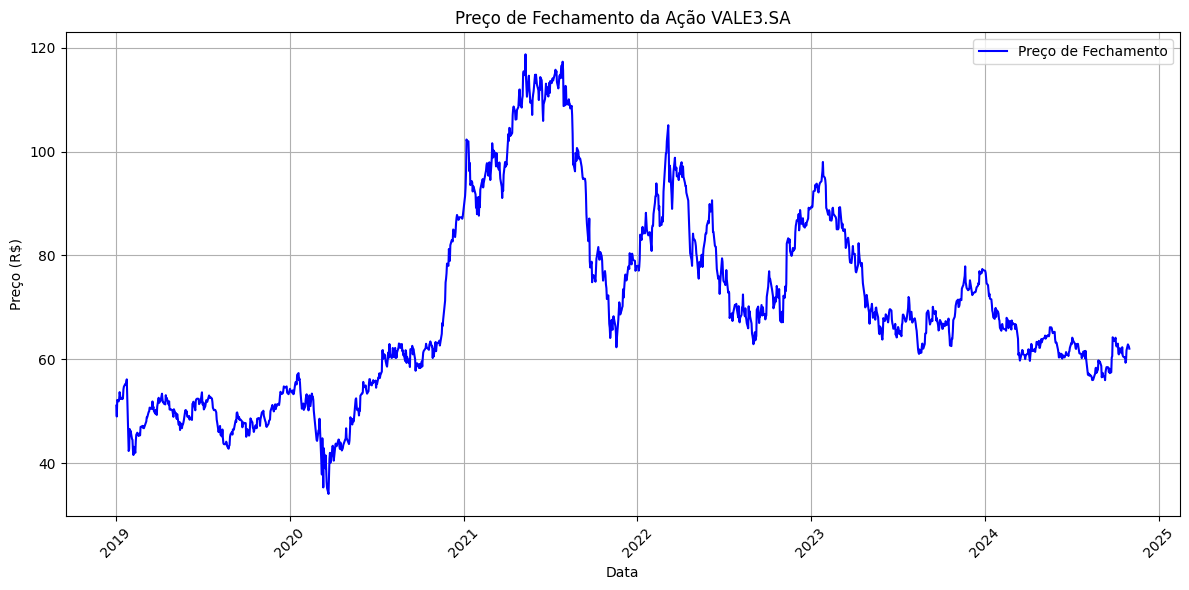

In [ ]:
#COMENTAR ---> CODIGO COM MENOR RETORNO -- NAO UTILIZADO NO TRABALHO

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import yfinance as yfin
from sklearn.metrics import accuracy_score, precision_score, recall_score


def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi


def calcula_macd(df, short=12, long=26, signal=9):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line


def predicao_modelo(baseTotal, baseX_teste, predictions):
  capital = 100000
  quantidadeAcoes = 0


  for i, row in baseTotal.iterrows():

    if i not in baseX_teste.index:
          continue
    # Previsão do modelo: 1 = compra, -1 = venda, 0 = hold
    predicao = predictions[baseX_teste.index.get_loc(i)]
    preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

    if i == pd.Timestamp("2024-01-03 00:00:00+00:00"):
      fimDeAno = True

    if predicao == 1 and quantidadeAcoes == 0:
      if capital >= preco_fechamento:
          precoCompra = preco_fechamento
          quantidadeAcoes = capital // precoCompra
          capital = 0
          print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")


    if predicao == -1 and quantidadeAcoes > 0:
        precoVenda = preco_fechamento
        capital = quantidadeAcoes * precoVenda
        quantidadeAcoes = 0
        print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

    if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
        precoVenda = preco_fechamento
        capital = quantidadeAcoes * precoVenda
        quantidadeAcoes = 0
        dataUltimaVenda = i
        print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

  return  capital, dataUltimaVenda


df = yfin.download("VALE3.SA", start="2019-01-02", end="2024-11-01")

df["RSI"] = calcula_rsi(df, 14)
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"])

# df["Variacao_Preco"] = df["Close"] - df["Close"].shift(1)
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(
    df["Variacao_Preco"] >= 0.41, 1, np.where(df["Variacao_Preco"] <= -0.38, -1, 0)
)

X = df[
    ["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line"]
].dropna()
y = df["Operacao"][X.index]

# selecionando dados para o treinamento
dados_treinamento = df[str(2019) : str(2022)]
X_treino = dados_treinamento[
    [
        "Open",
        "Close",
        "High",
        "Low",
        "Volume",
        "RSI",
        "MACD",
        "Signal_Line",
        "Variacao_Preco",
    ]
].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

# selecionando dados para o teste
dados_simulacao = df[str(2023) : str(2024)]
X_simulacao = dados_simulacao[
    [
        "Open",
        "Close",
        "High",
        "Low",
        "Volume",
        "RSI",
        "MACD",
        "Signal_Line",
        "Variacao_Preco",
    ]
].dropna()

k = 10
kf = KFold(n_splits=k)

scaler = StandardScaler()

accuracy_scores = []
precision_scores = []
recall_scores = []
capital_history = []

bestScaler = None
melhorModelo = None
melhorAcuracia = 0

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(kernel="linear")
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracyAtual = accuracy_score(y_test, predictions)
    precisionAtual = precision_score(
        y_test, predictions, average="macro", zero_division=0
    )
    recallAtual = recall_score(y_test, predictions, average="macro", zero_division=0)

    accuracy_scores.append(accuracyAtual)
    precision_scores.append(precisionAtual)
    recall_scores.append(recallAtual)

    if accuracyAtual >= melhorAcuracia:
        melhorAcuracia = accuracyAtual
        melhorModelo = model
        bestScaler = scaler
    accuracy_scores.append(accuracyAtual)


mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"\nMétricas de validação cruzada (K-Fold):")
print(f"Melhor acurácia: {melhorAcuracia:.2f}")
print(f"Acurácia média: {mean_accuracy:.2f}")
print(f"Precisão média: {mean_precision:.2f}")
print(f"Recall médio: {mean_recall:.2f}")

X_simulacao_scaled = scaler.transform(X_simulacao)
prediction = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, prediction)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")

plt.figure(figsize=(12, 6))

plt.plot(df['Close'], label='Preço de Fechamento', color='blue')

plt.title('Preço de Fechamento da Ação VALE3.SA')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#CODIGO NAO UTILIZADO NO TRABALHO --- TESTE
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
import yfinance as yfin

def calcula_rsi(df, window):
    delta = df["Close"].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calcula_macd(df, short=15, long=30, signal=12):
    short_ema = df.ewm(span=short, adjust=False).mean()
    long_ema = df.ewm(span=long, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def predicao_modelo(baseTotal, baseX_teste, predictions, stop_loss_pct=0.05, take_profit_pct=0.1):
    capital = 100000
    quantidadeAcoes = 0
    precoCompra = 0
    dataUltimaVenda = None

    for i, row in baseTotal.iterrows():
        if i not in baseX_teste.index:
            continue

        predicao = predictions[baseX_teste.index.get_loc(i)]
        preco_fechamento = row['Close'] if isinstance(row['Close'], (int, float)) else row['Close'].iloc[0]

        if predicao == 1 and quantidadeAcoes == 0:
            if capital >= preco_fechamento:
                precoCompra = preco_fechamento
                quantidadeAcoes = capital // precoCompra
                capital = 0
                print(f"Comprado {quantidadeAcoes} ações por R$ {precoCompra} no dia {i}")

        if quantidadeAcoes > 0 and (preco_fechamento <= precoCompra * (1 - stop_loss_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Stop-Loss ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if quantidadeAcoes > 0 and (preco_fechamento >= precoCompra * (1 + take_profit_pct)):
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Take-Profit ativado. Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if predicao == -1 and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            print(f"Vendido por R$ {precoVenda} no dia {i}, capital atual: {capital}")

        if i.strftime('%m-%d') == '01-02' and quantidadeAcoes > 0:
            precoVenda = preco_fechamento
            capital = quantidadeAcoes * precoVenda
            quantidadeAcoes = 0
            dataUltimaVenda = i
            print(f"Venda final no fim do ano por R$ {precoVenda} no dia {dataUltimaVenda}, capital atualizado: {capital}")

    return capital, dataUltimaVenda


df = yfin.download("VALE3.SA", start="2019-01-02", end="2024-11-01")
# retorno com 14 ----> aproximadamente 125K
df["RSI"] = calcula_rsi(df, 14) # alterando o periodo de 14 para 7 ---> retorno menor: aproximadamente 121K # alterando o periodo de 14 para 21 ---> retorno menor: aproximadamente 123K
df["MACD"], df["Signal_Line"] = calcula_macd(df["Close"]) #mantendo o rsi com 14 e alterando para (short=9, long=18, signal=6) retorno de 123K
#mantendo o rsi com 14 e alterando para (short=15, long=30, signal=12) ----> retorno de 124K
#mesmo alterando o MACD e o RSI para diferentes combinacoes, o RSI com 14 ainda retorna o melhor valor
df["Variacao_Preco"] = df['Close'].pct_change() * 100
df["Variacao_Preco"] = df["Variacao_Preco"].fillna(0)
df["Operacao"] = np.where(df["Variacao_Preco"] >= 0.1, 1, np.where(df["Variacao_Preco"] <= -0.19, -1, 0))

X = df[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line"]].dropna()
y = df["Operacao"][X.index]

dados_treinamento = df[str(2019):str(2022)]
X_treino = dados_treinamento[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()
Y_treino = dados_treinamento["Operacao"][X_treino.index]

dados_simulacao = df[str(2023):str(2024)]
X_simulacao = dados_simulacao[["Open", "Close", "High", "Low", "Volume", "RSI", "MACD", "Signal_Line", "Variacao_Preco"]].dropna()


param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.01, 0.1, 1]
}
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
scaler = StandardScaler()

X_treino_scaled = scaler.fit_transform(X_treino)
grid_search.fit(X_treino_scaled, Y_treino)

melhorModelo = grid_search.best_estimator_
melhores_parametros = grid_search.best_params_
print(f"Melhores parâmetros encontrados pelo GridSearch: {melhores_parametros}")


k = 10
kf = KFold(n_splits=k)

accuracy_scores = []
precision_scores = []
recall_scores = []

for train_index, test_index in kf.split(X_treino):
    X_train, X_test = X_treino.iloc[train_index], X_treino.iloc[test_index]
    y_train, y_test = Y_treino.iloc[train_index], Y_treino.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(C=10, gamma=0.01, kernel='linear')
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    accuracy_scores.append(accuracy_score(y_test, predictions))
    precision_scores.append(precision_score(y_test, predictions, average="macro", zero_division=0))
    recall_scores.append(recall_score(y_test, predictions, average="macro", zero_division=0))

mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"\nMétricas de validação cruzada (K-Fold):")
print(f"Acurácia média: {mean_accuracy:.2f}")
print(f"Precisão média: {mean_precision:.2f}")
print(f"Recall médio: {mean_recall:.2f}")


X_simulacao_scaled = scaler.transform(X_simulacao)
predictions = melhorModelo.predict(X_simulacao_scaled)

capital, dataVendaFinal = predicao_modelo(df, X_simulacao, predictions)

print(f"Capital final: R$ {capital}; Data da última transação: {dataVendaFinal}")


[*********************100%***********************]  1 of 1 completed


Melhores parâmetros encontrados pelo GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

Métricas de validação cruzada (K-Fold):
Acurácia média: 0.99
Precisão média: 0.98
Recall médio: 0.97
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00
Venda final no fim do ano por R$ 89.4000015258789 no dia 2023-01-02 00:00:00+00:00, capital atualizado: 99949.20170593262
Comprado 1118.0 ações por R$ 89.4000015258789 no dia 2023-01-04 00:00:00+00:00
Vendido por R$ 93.25 no dia 2023-01-11 00:00:00+00:00, capital atual: 104253.5
Comprado 1112.0 ações por R$ 93.73999786376953 no dia 2023-01-12 00:00:00+00:00
Vendido por R$ 92.25 no dia 2023-01-16 00:00:00+00:00, capital atual: 102582.0
Comprado 1099.0 ações por R$ 93.33999633789062 no dia 2023-01-18 00:00:00+00:00
Vendido por R$ 95.31999969482422 no dia 2023-01-27 00:00:00+00:00, capital atual: 104756.67966461182
Comprado 1184.0 ações por R$ 88.41999816894531 no dia 2023-02-07 00:00:00+00:00
Vendido por R$ 88.3899993